In [2]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os
import random
########## INPUT ############
f=5 # number of fake_backend want to choose
lower_limit= 3 # the lower limit of qubits for the circuit
upper_limit= 20 # the lower limit of qubits for the circuit
steps= 3 #jump in qubit numbers
name_of_algo='bitcode'

In [3]:
#all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
#selected_fakes = random.sample(all_fakes, f)
#selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list
selected_fakes=[qiskit.providers.fake_provider.backends.boeblingen.fake_boeblingen.FakeBoeblingenV2,
 qiskit.providers.fake_provider.backends.rome.fake_rome.FakeRomeV2,
 qiskit.providers.fake_provider.backends.geneva.fake_geneva.FakeGeneva,
 qiskit.providers.fake_provider.backends.toronto.fake_toronto.FakeTorontoV2,
 qiskit.providers.fake_provider.backends.rochester.fake_rochester.FakeRochesterV2]

[qiskit.providers.fake_provider.backends.boeblingen.fake_boeblingen.FakeBoeblingenV2,
 qiskit.providers.fake_provider.backends.rome.fake_rome.FakeRomeV2,
 qiskit.providers.fake_provider.backends.geneva.fake_geneva.FakeGeneva,
 qiskit.providers.fake_provider.backends.toronto.fake_toronto.FakeTorontoV2,
 qiskit.providers.fake_provider.backends.rochester.fake_rochester.FakeRochesterV2]

In [4]:
benchmarks=[]
for i in range(lower_limit,upper_limit,steps):
    label = name_of_algo+str(i)
    rand_list=[]
    for j in range(i):       
        rand_list.append(random.randint(0,1))
    print("i=",i,"i-1=",i-1,"rand_list=",rand_list)
    benchmarks.append((supermarq.bit_code.BitCode(i,i-1,rand_list),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    #circuit.draw(output="mpl")
    print(circuit.draw())

i= 3 i-1= 2 rand_list= [0, 1, 0]
i= 6 i-1= 5 rand_list= [0, 1, 1, 1, 1, 1]
i= 9 i-1= 8 rand_list= [0, 0, 1, 1, 1, 0, 0, 1, 1]
i= 12 i-1= 11 rand_list= [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]
i= 15 i-1= 14 rand_list= [1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]
i= 18 i-1= 17 rand_list= [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1]
-------------------------- bitcode3 ---------------------------
                                                    ┌─┐                      
         q_0: ──■──────────────────────■────────────┤M├──────────────────────
              ┌─┴─┐     ┌───┐┌─┐     ┌─┴─┐     ┌───┐└╥┘┌─┐             ┌─┐   
         q_1: ┤ X ├─────┤ X ├┤M├─|0>─┤ X ├─────┤ X ├─╫─┤M├─|0>─────────┤M├───
              ├───┤     └─┬─┘└╥┘     └───┘     └─┬─┘ ║ └╥┘     ┌─┐     └╥┘   
         q_2: ┤ X ├──■────■───╫─────────────■────■───╫──╫──────┤M├──────╫────
              └───┘┌─┴─┐┌───┐ ║  ┌─┐      ┌─┴─┐┌───┐ ║  ║  ┌─┐ └╥┘      ║ ┌─┐
         q_3: ─────┤ X ├┤ X ├─╫──┤M├──|0>─┤ X ├┤ X 

In [5]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'bitcode3': [0.4, 0.5, 0.8888888888888888, 0.6, 0.2222222222222222, 0], 'bitcode6': [0.18181818181818182, 0.2, 0.9090909090909091, 0.6859504132231405, 0.23809523809523808, 0.15], 'bitcode9': [0.11764705882352941, 0.125, 0.9624060150375939, 0.7024221453287197, 0.2727272727272727, 0.18198529411764705], 'bitcode12': [0.08695652173913043, 0.09090909090909091, 0.983739837398374, 0.7117202268431002, 0.28888888888888886, 0.1976284584980237], 'bitcode15': [0.06896551724137931, 0.07142857142857142, 0.98, 0.7211652794292509, 0.2807017543859649, 0.2105911330049261], 'bitcode18': [0.05714285714285714, 0.058823529411764705, 0.9796610169491525, 0.726938775510204, 0.2608695652173913, 0.2184873949579832]}


In [ ]:
%time
import time
import pandas as pd
from IPython.display import display
jobs =[]
data=[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        score_list=[]
        timetaken=[]
        for i in range(0,5):
            start=time.time()
            job = backend().run(circuit, shots=1000)
            end=time.time()-start
            result = job.result()
            counts = job.result(0).get_counts()
            score = benchmark.score(counts)
            score_list.append(score)
            t=job.result(0).time_taken
            timetaken.append(t)
            #print(i+1,"th iteration Execution time::",t)
            print(label ," ExecutionTime:",t,"")
        print("------------------------------------------")
        score = np.mean(score_list) 
        sd = np.std(score_list)
        execution_time = np.mean(timetaken)
        dictionary={}
        dictionary["Backend_Time"]=backend().name
        dictionary["ciruit_Name"]=label    
        dictionary["Execution_Time"]=execution_time
        dictionary["Total_Time"]=end
        data.append(dictionary)
        jobs.append((label,benchmark,backend,job,score,sd,execution_time,end))
#jobs
df = pd.DataFrame(data)
display(df)
df.to_excel(r"./output_bit_code.xlsx", index=False)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
=============SCORES OF ALL THE CIRCUITS=============
BACKEND-NAME ::  fake_boeblingen
bitcode3  ExecutionTime: 0.5252223014831543 
bitcode3  ExecutionTime: 0.2972290515899658 
bitcode3  ExecutionTime: 0.47056055068969727 
bitcode3  ExecutionTime: 0.2908031940460205 
bitcode3  ExecutionTime: 0.464000940322876 
------------------------------------------
bitcode6  ExecutionTime: 1.0887370109558105 
bitcode6  ExecutionTime: 1.2429156303405762 
bitcode6  ExecutionTime: 1.1951701641082764 
bitcode6  ExecutionTime: 1.2691822052001953 
bitcode6  ExecutionTime: 0.9660224914550781 
------------------------------------------
bitcode9  ExecutionTime: 79.44833850860596 
bitcode9  ExecutionTime: 75.48478531837463 
bitcode9  ExecutionTime: 77.41068315505981 
bitcode9  ExecutionTime: 77.45601749420166 
bitcode9  ExecutionTime: 75.61652493476868 
------------------------------------------


In [6]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    i={}
    for label,benchmark,backend,job,score,sd in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   

USED BACKEND:: fake_paris ; CIRCUIT_NAME: bitcode3 ; SCORE = 0.0


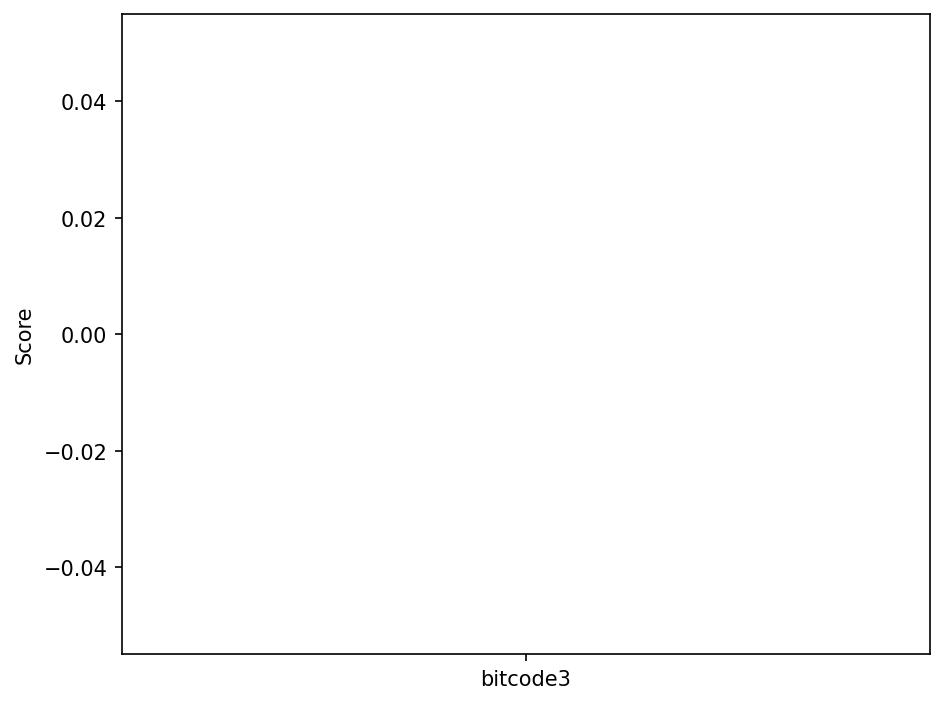

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: bitcode4 ; SCORE = 9.860761315262648e-33


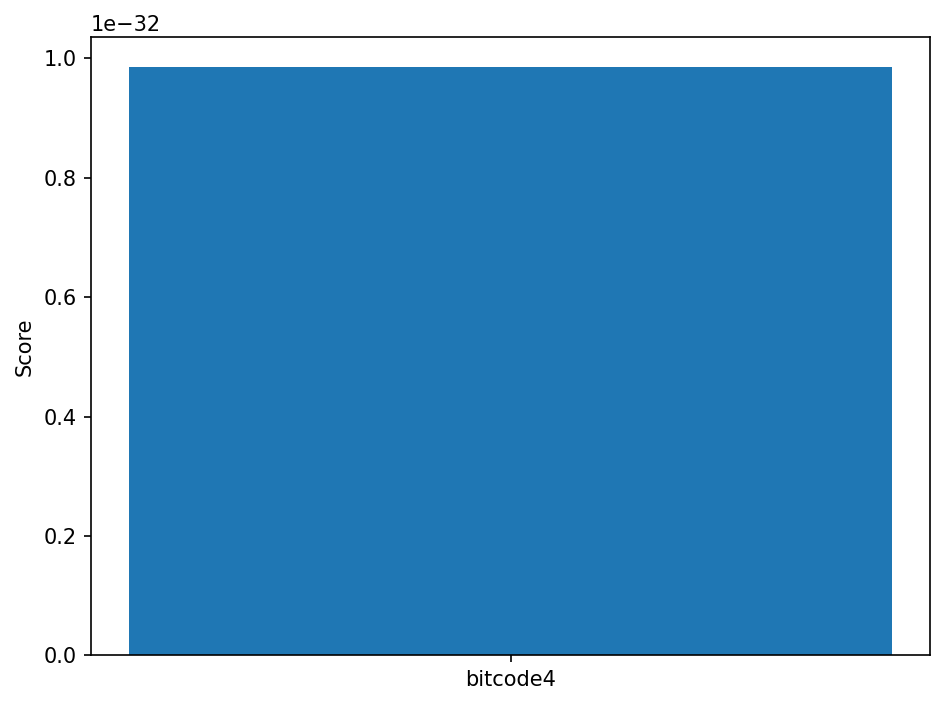

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: bitcode5 ; SCORE = 0.0


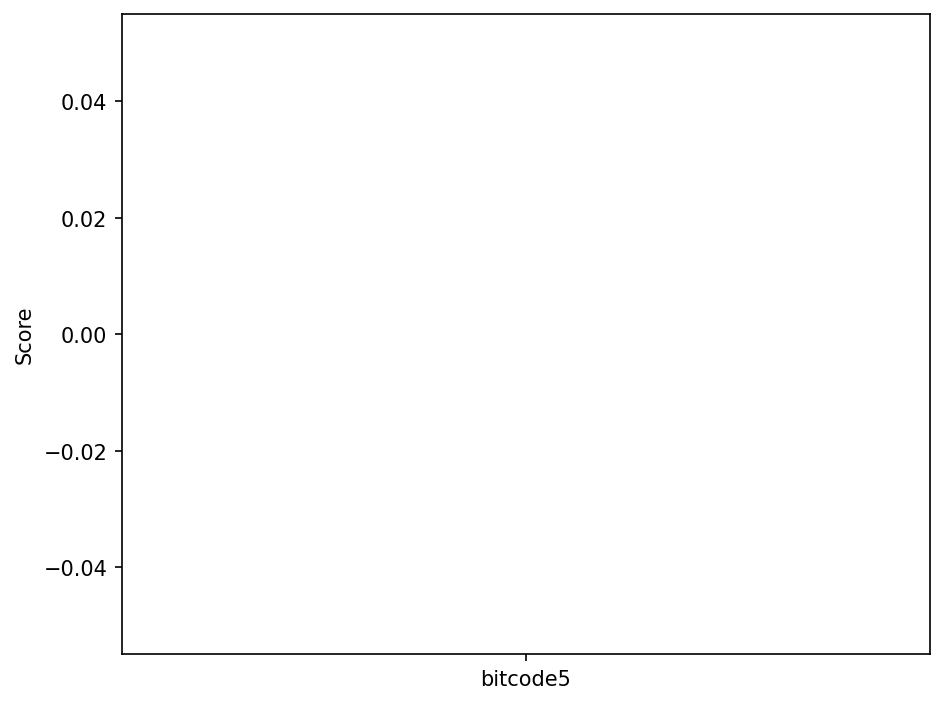

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: bitcode6 ; SCORE = 1.5777218104420237e-31


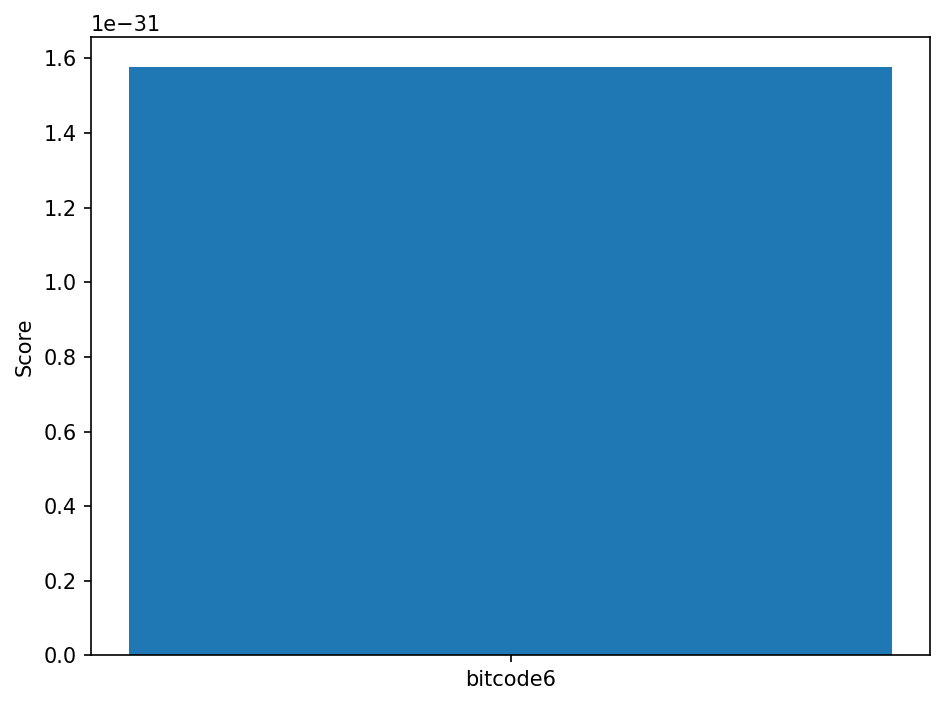

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: bitcode7 ; SCORE = 1.9721522630525295e-31


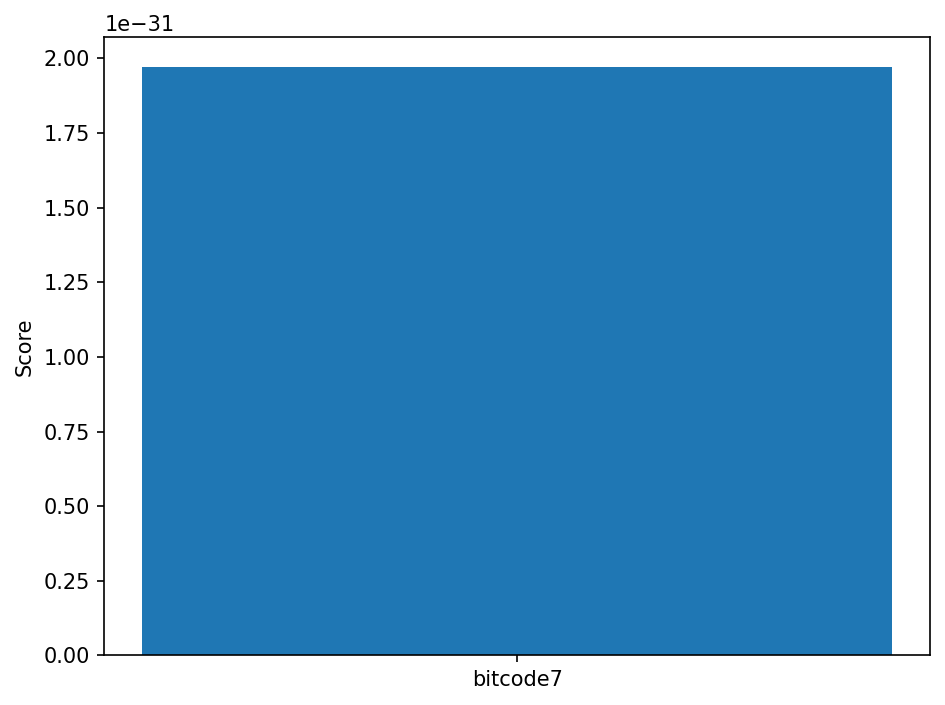

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: bitcode8 ; SCORE = 1.9721522630525295e-31


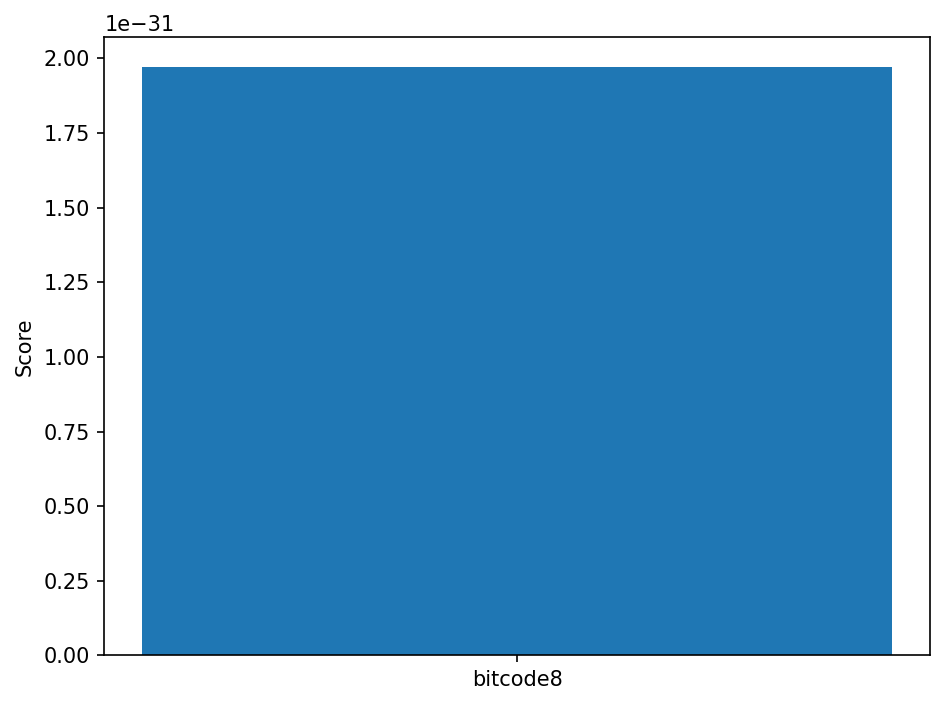

-----------------------------------------------------------
USED BACKEND:: fake_cambridge ; CIRCUIT_NAME: bitcode3 ; SCORE = 0.0


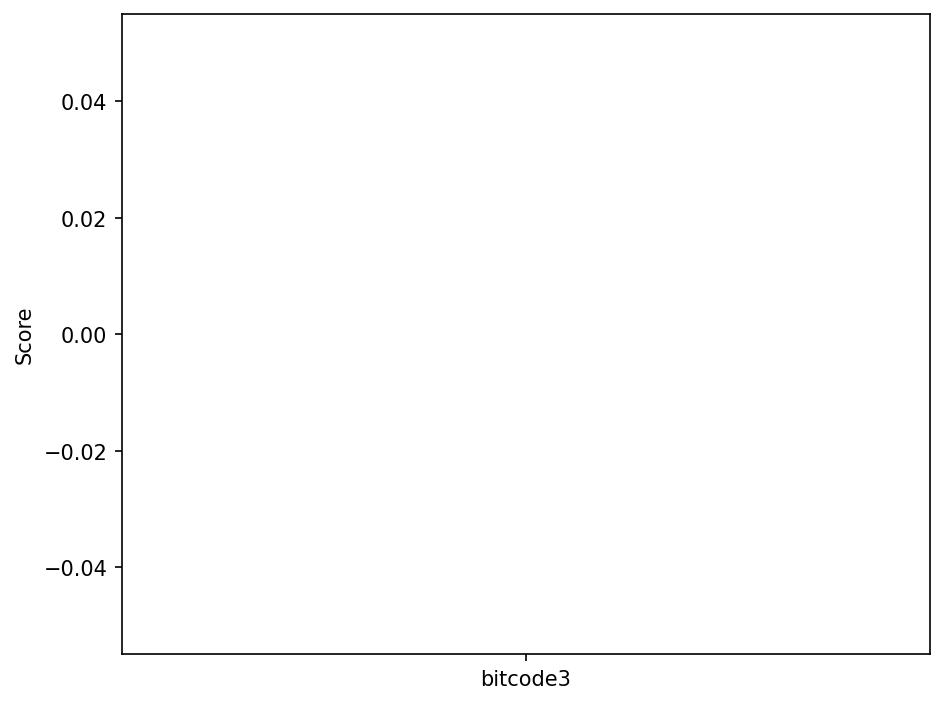

-----------------------------------------------------------
USED BACKEND:: fake_cambridge ; CIRCUIT_NAME: bitcode4 ; SCORE = 0.0


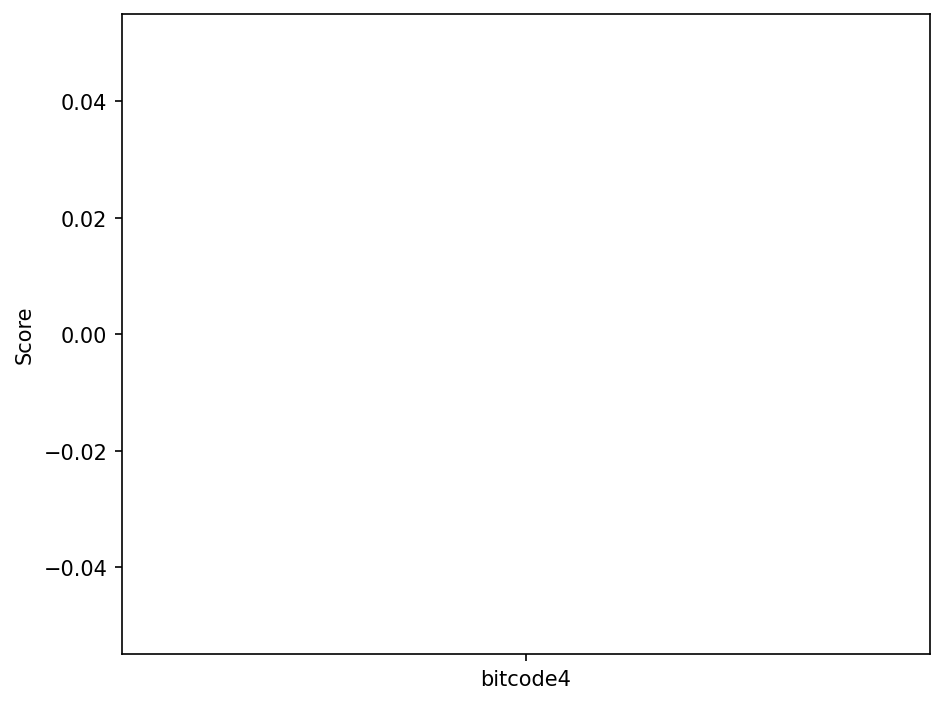

-----------------------------------------------------------
USED BACKEND:: fake_cambridge ; CIRCUIT_NAME: bitcode5 ; SCORE = 1.9721522630525295e-31


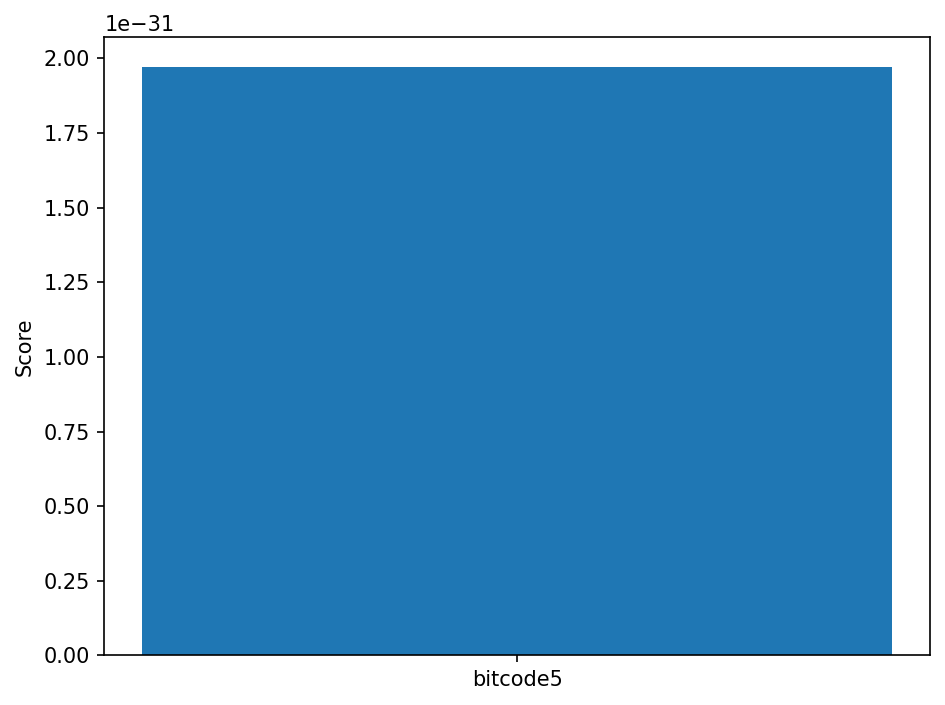

-----------------------------------------------------------
USED BACKEND:: fake_cambridge ; CIRCUIT_NAME: bitcode6 ; SCORE = 1.9721522630525295e-31


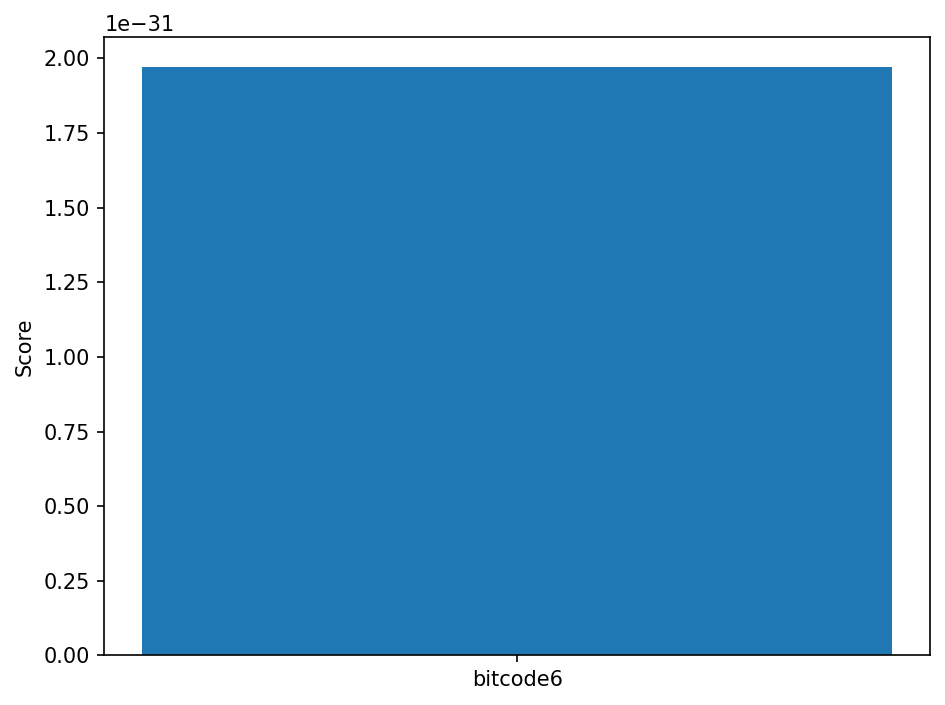

-----------------------------------------------------------
USED BACKEND:: fake_cambridge ; CIRCUIT_NAME: bitcode7 ; SCORE = 1.9721522630525295e-31


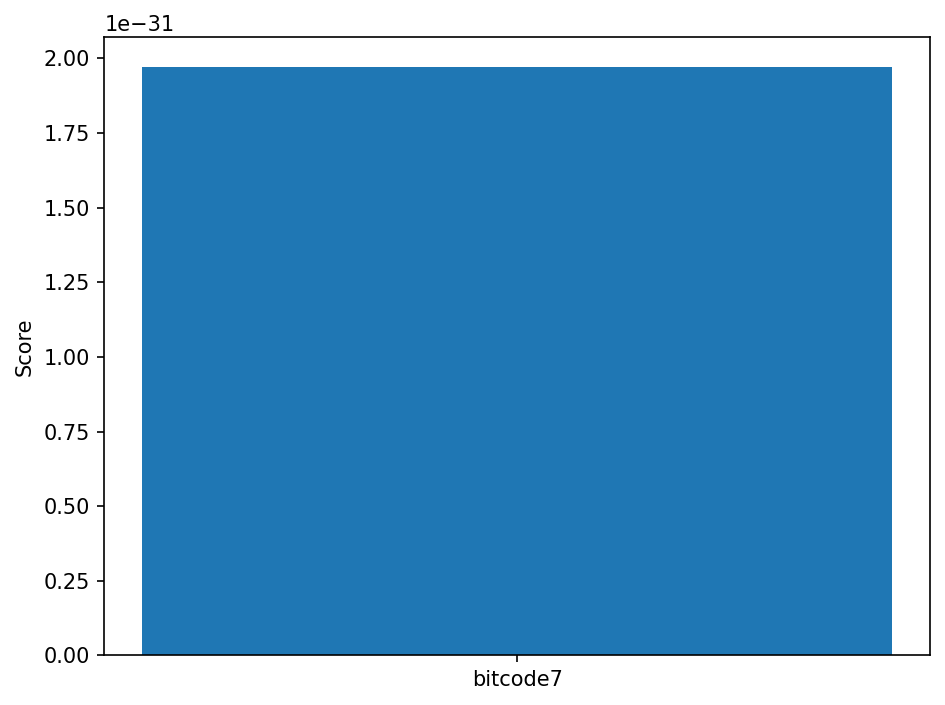

-----------------------------------------------------------
USED BACKEND:: fake_cambridge ; CIRCUIT_NAME: bitcode8 ; SCORE = 1.9721522630525295e-31


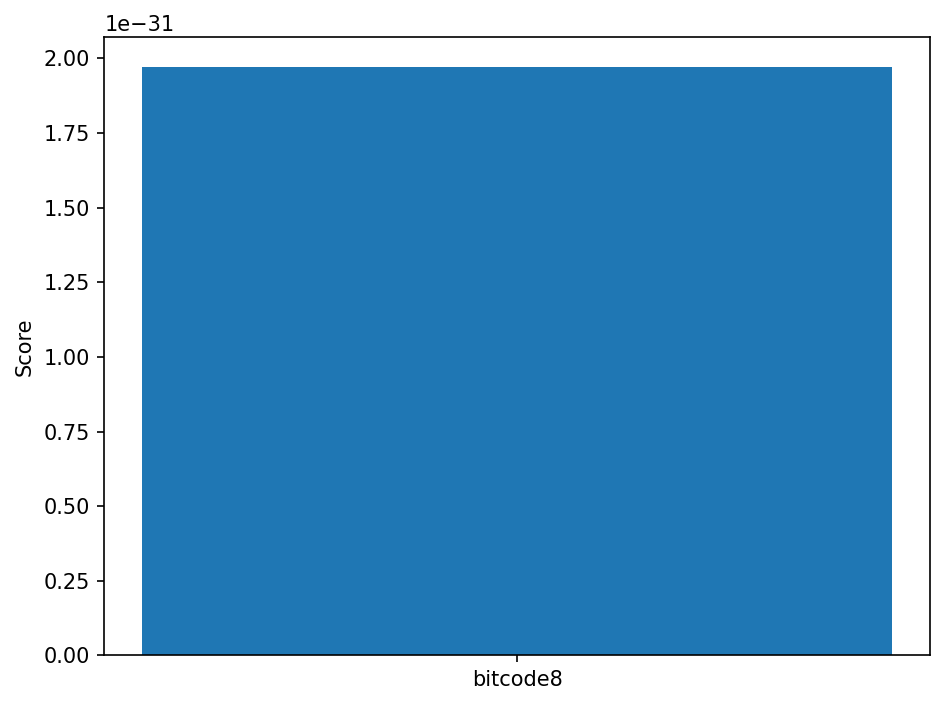

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: bitcode3 ; SCORE = 0.0


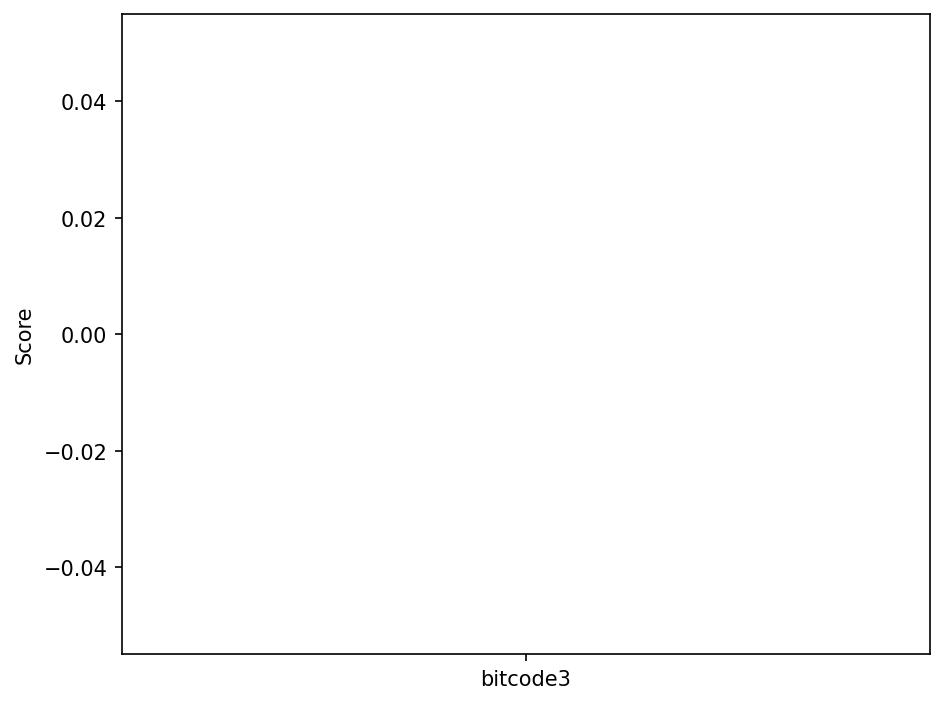

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: bitcode4 ; SCORE = 0.0


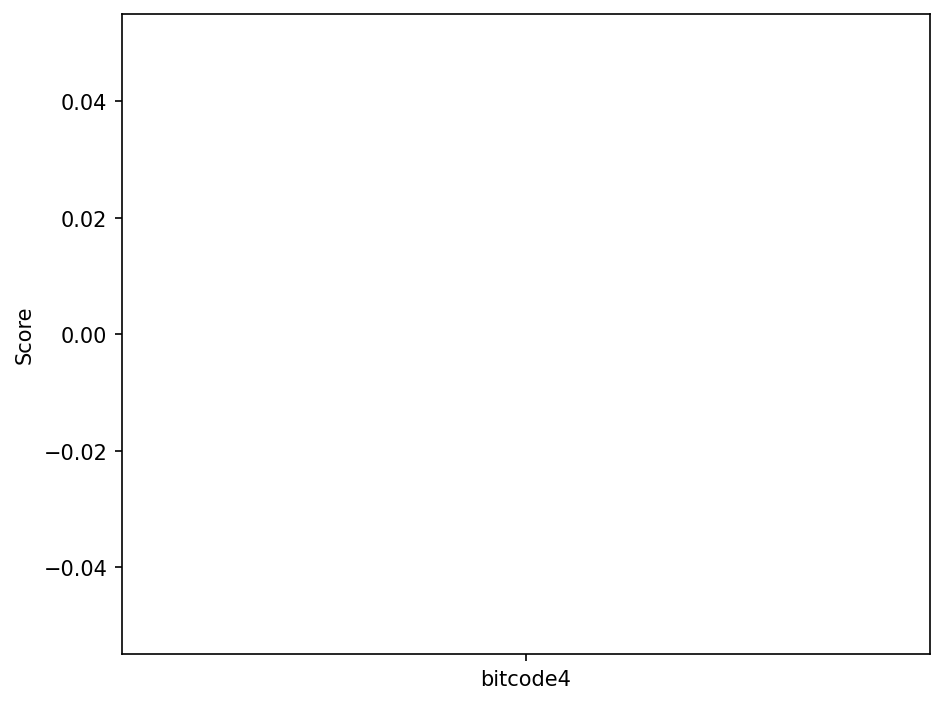

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: bitcode5 ; SCORE = 0.0


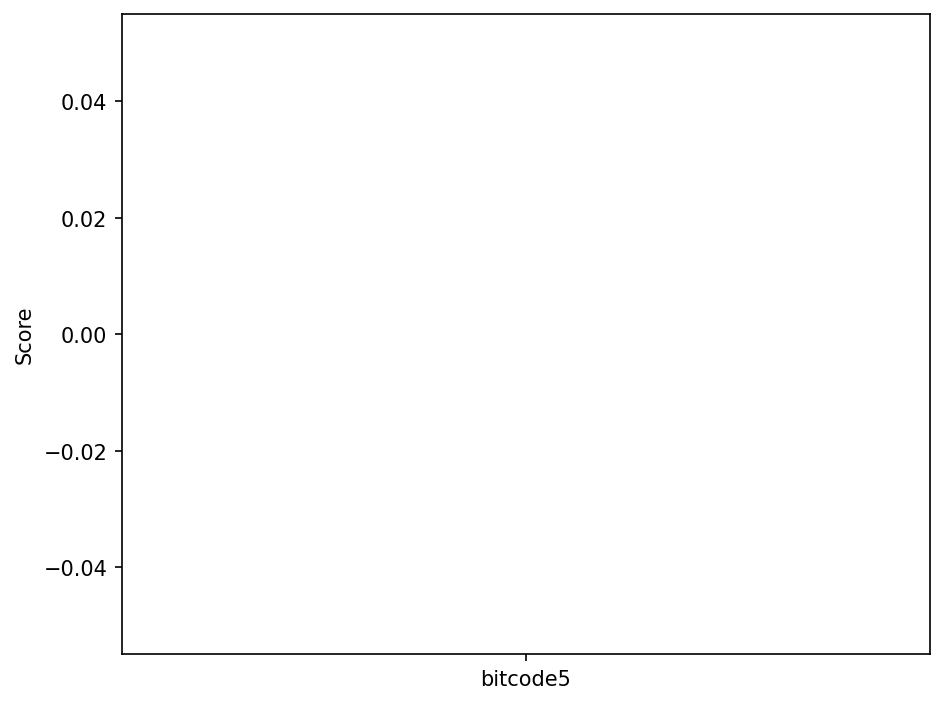

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: bitcode6 ; SCORE = 1.9721522630525295e-31


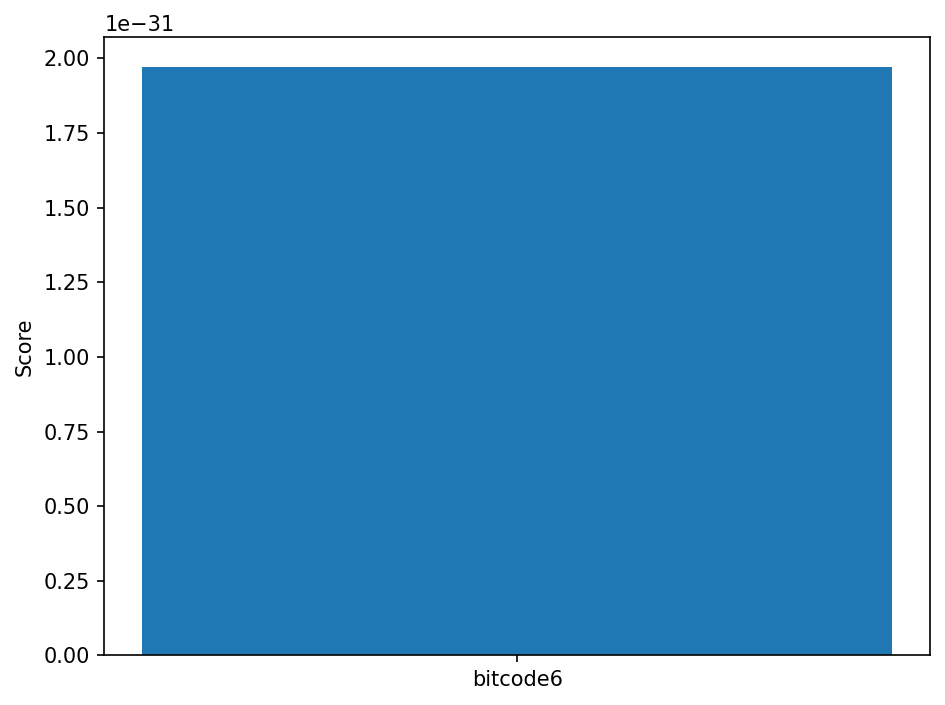

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: bitcode7 ; SCORE = 1.9721522630525295e-31


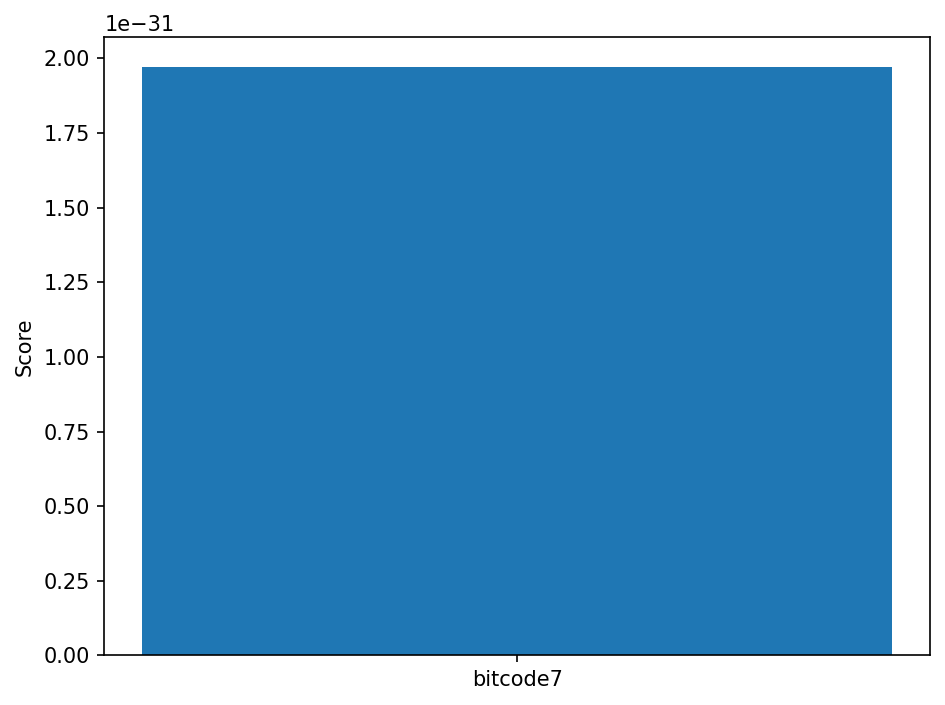

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: bitcode8 ; SCORE = 1.9721522630525295e-31


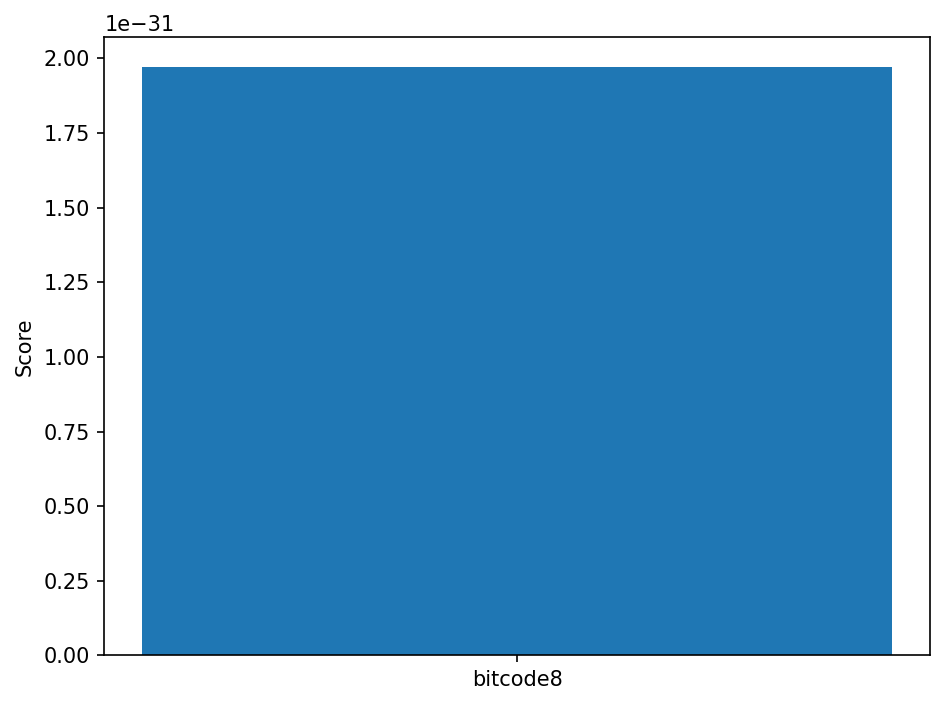

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: bitcode3 ; SCORE = 0.0


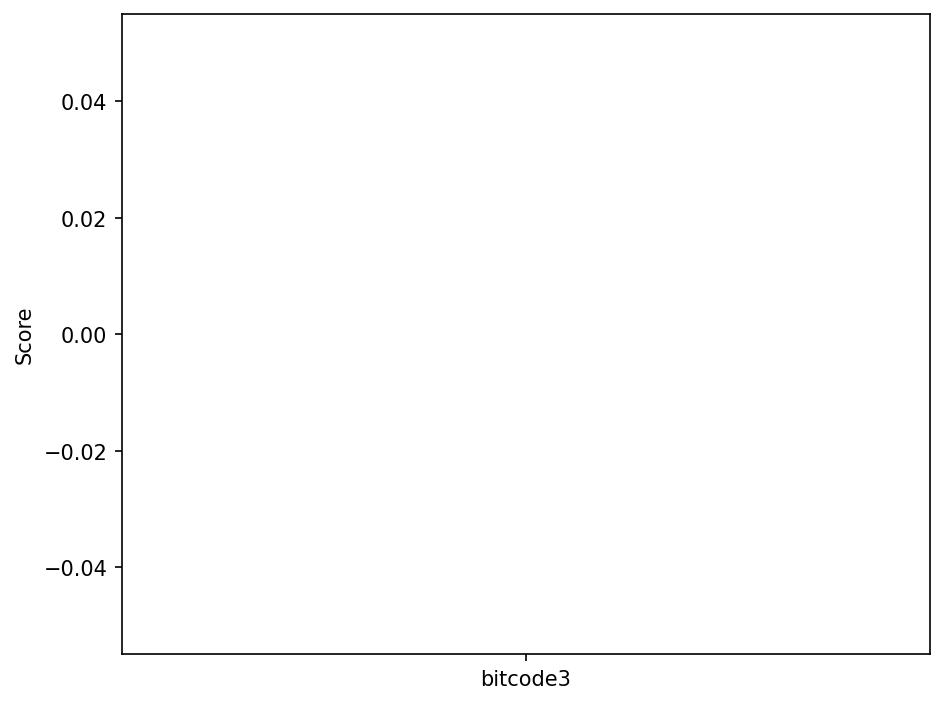

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: bitcode4 ; SCORE = 0.0


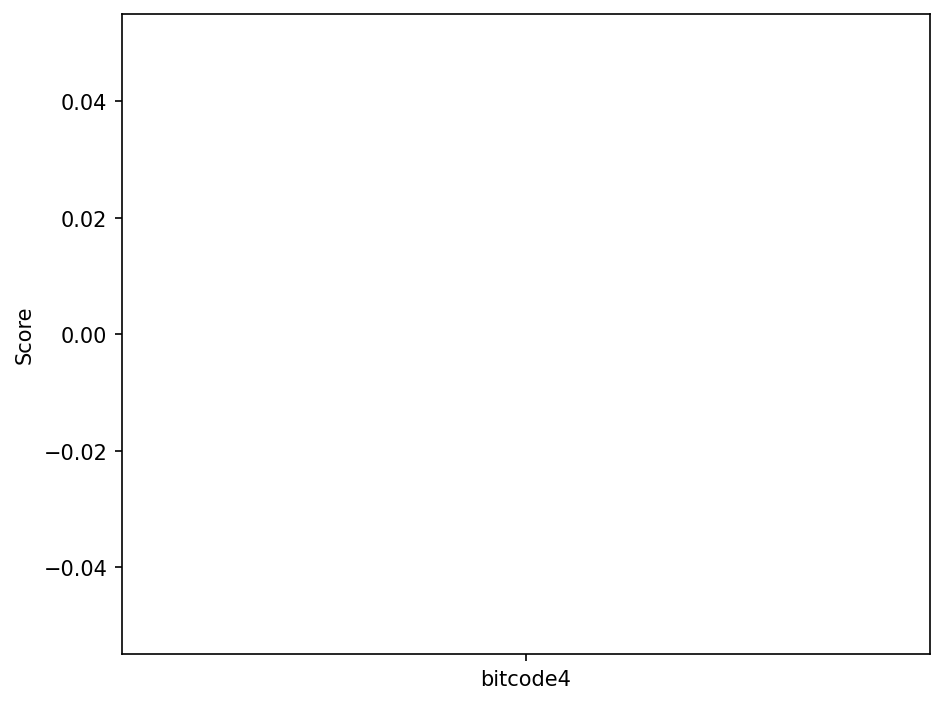

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: bitcode5 ; SCORE = 0.0


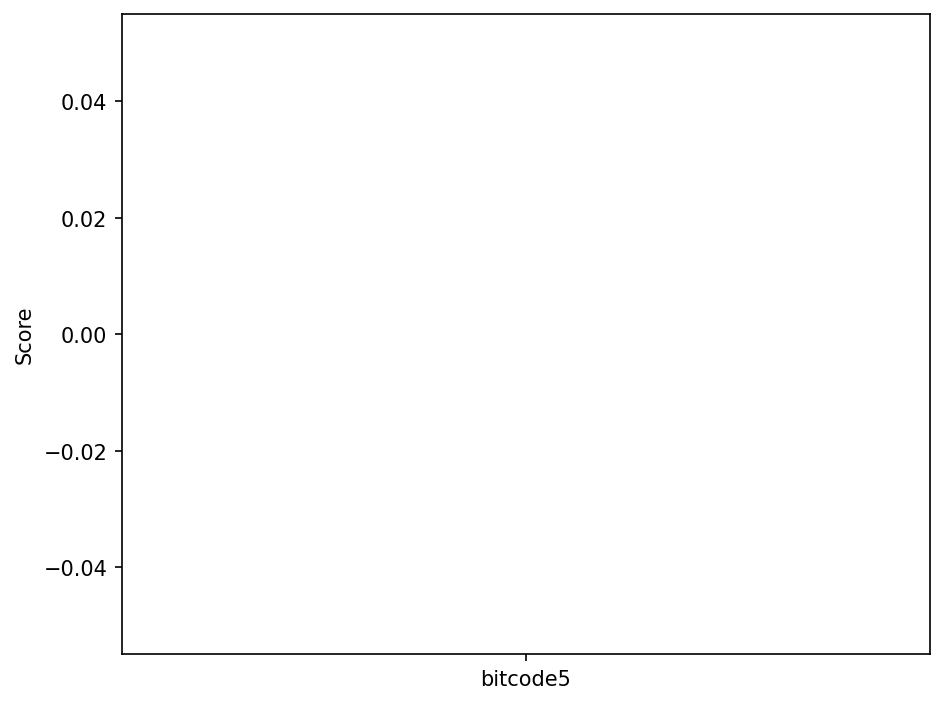

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: bitcode6 ; SCORE = 0.0


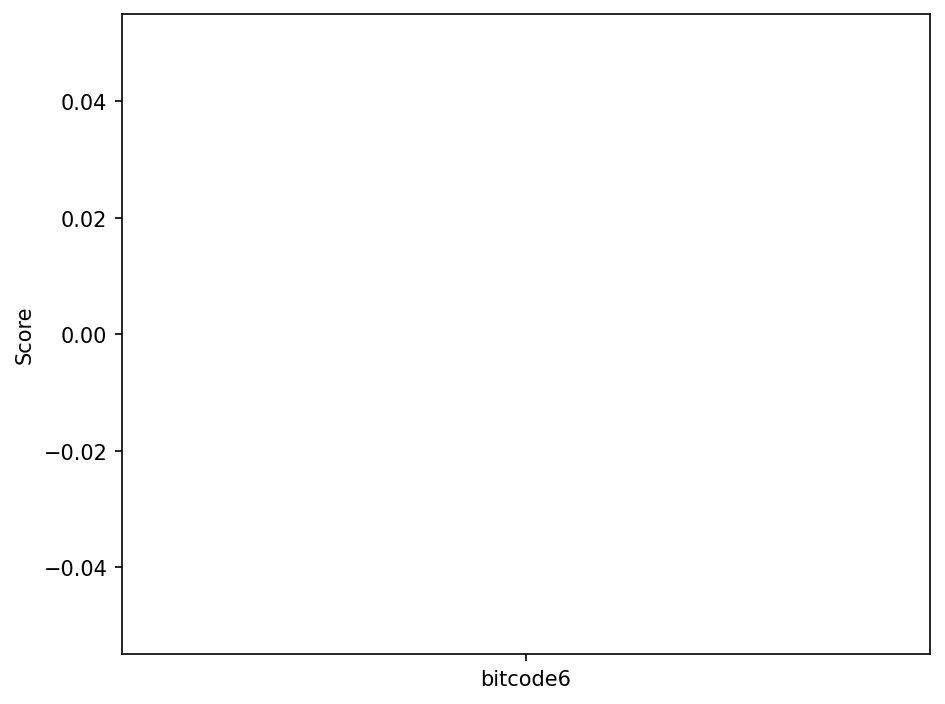

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: bitcode7 ; SCORE = 0.0


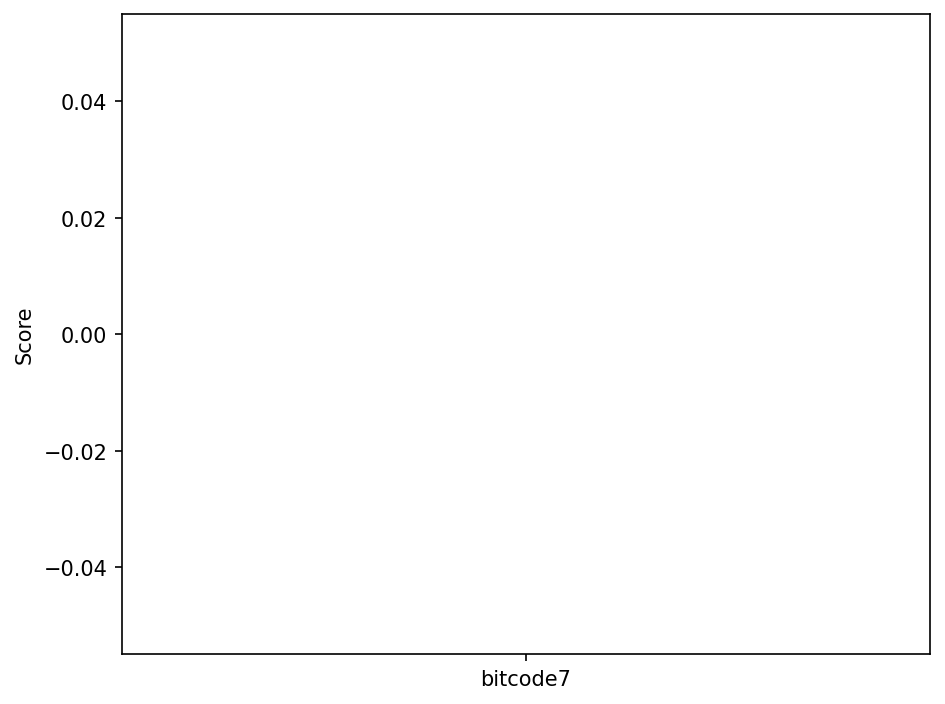

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: bitcode8 ; SCORE = 0.0


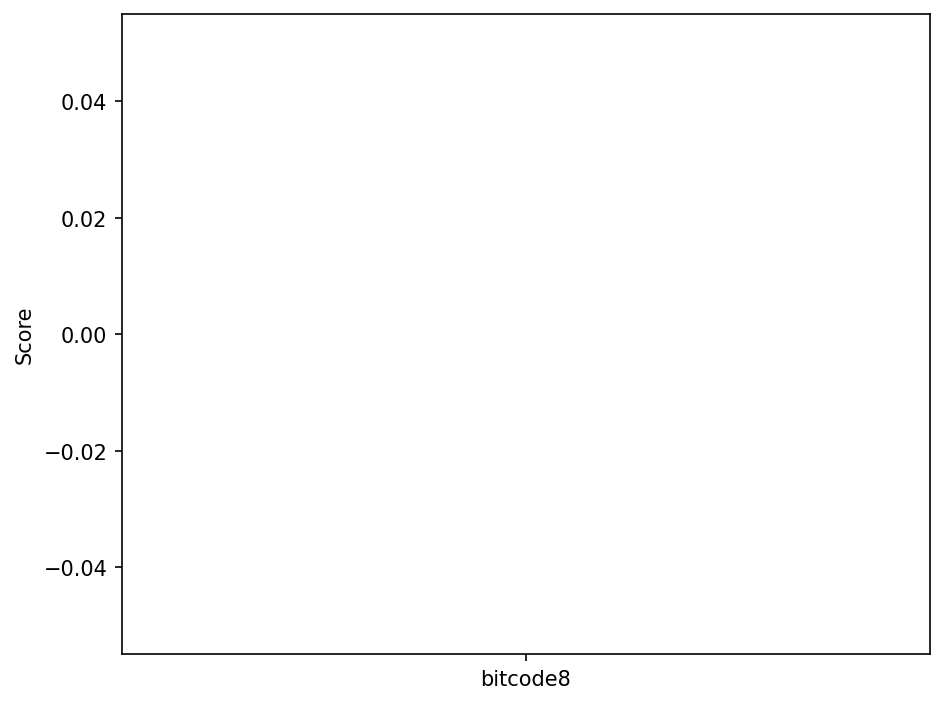

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: bitcode3 ; SCORE = 0.0


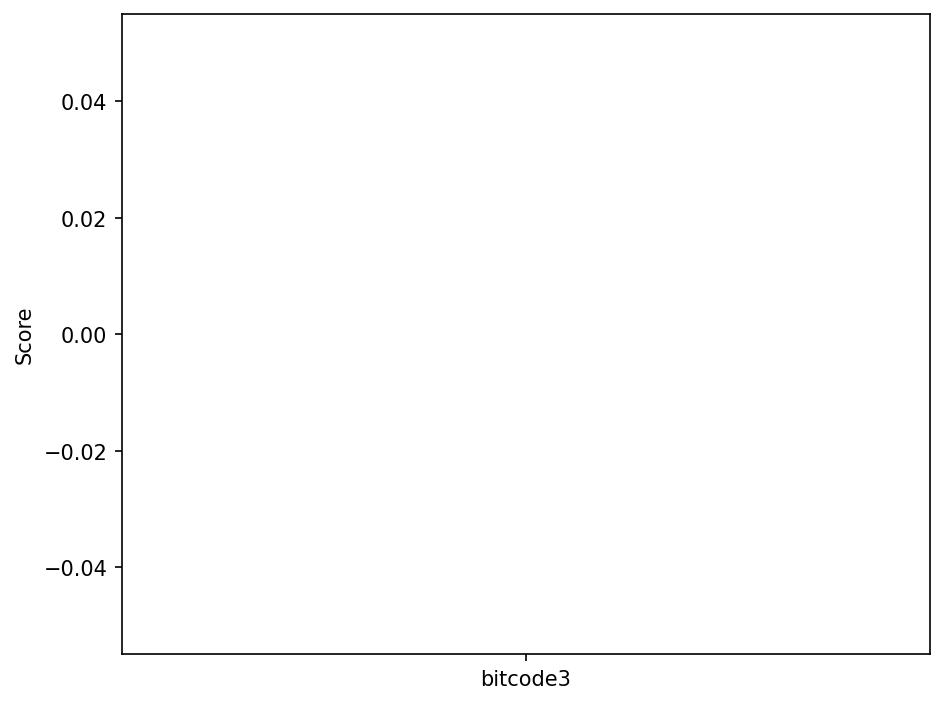

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: bitcode4 ; SCORE = 0.0


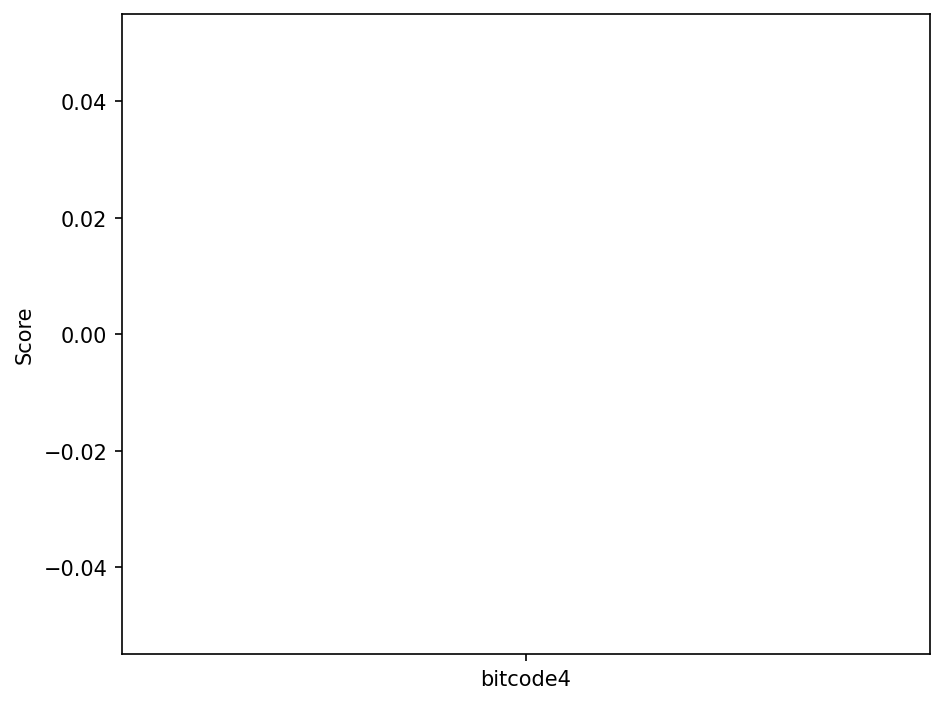

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: bitcode5 ; SCORE = 0.0


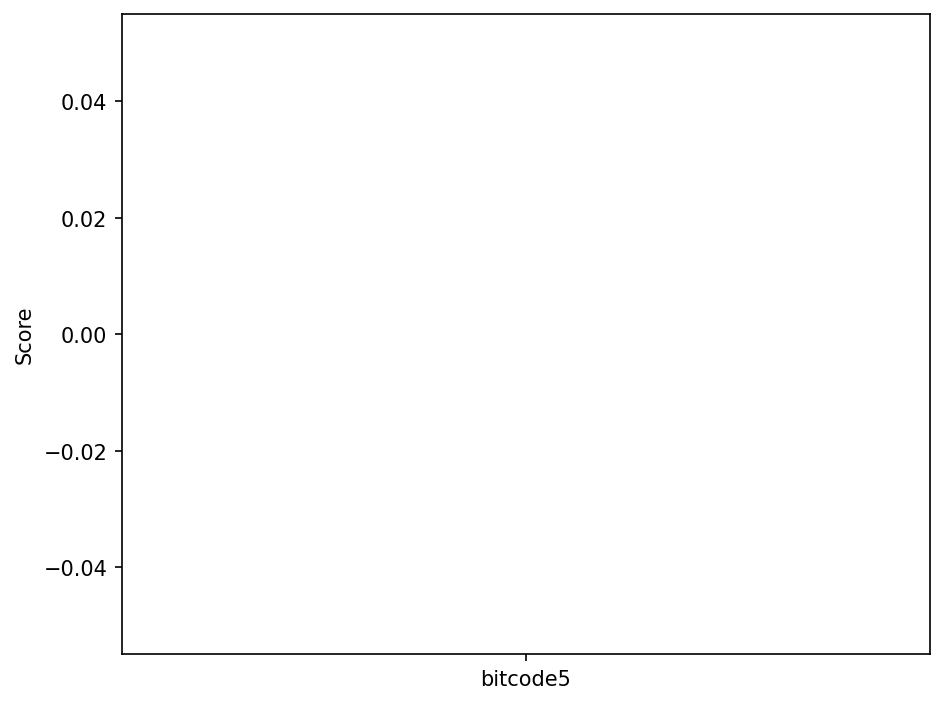

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: bitcode6 ; SCORE = 0.0


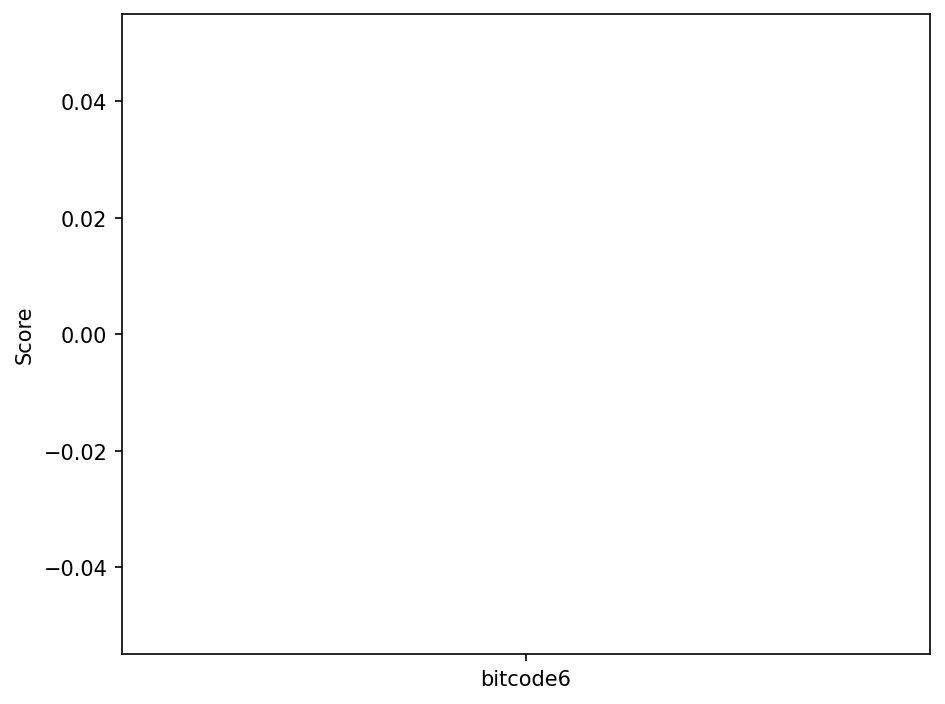

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: bitcode7 ; SCORE = 0.0


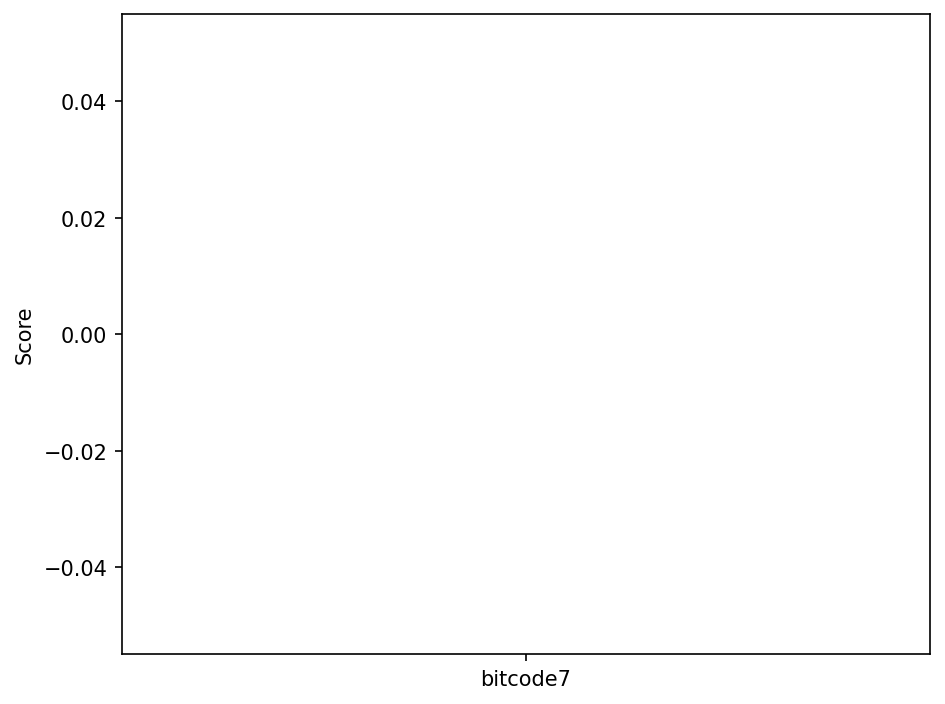

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: bitcode8 ; SCORE = 0.0


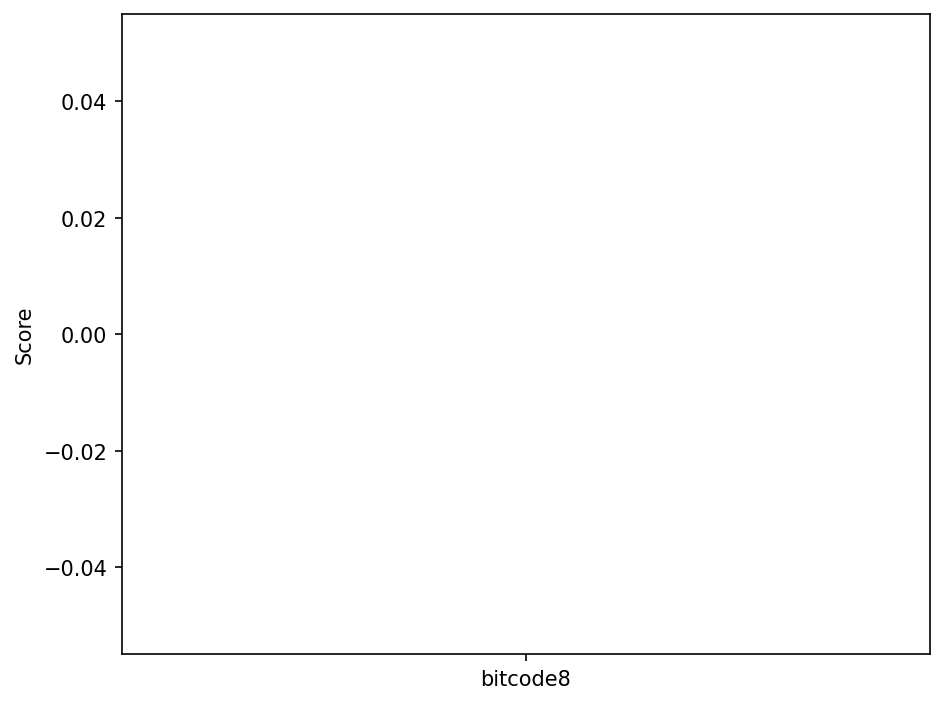

-----------------------------------------------------------


In [7]:
for label,benchmark,backend,job,score,sd in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

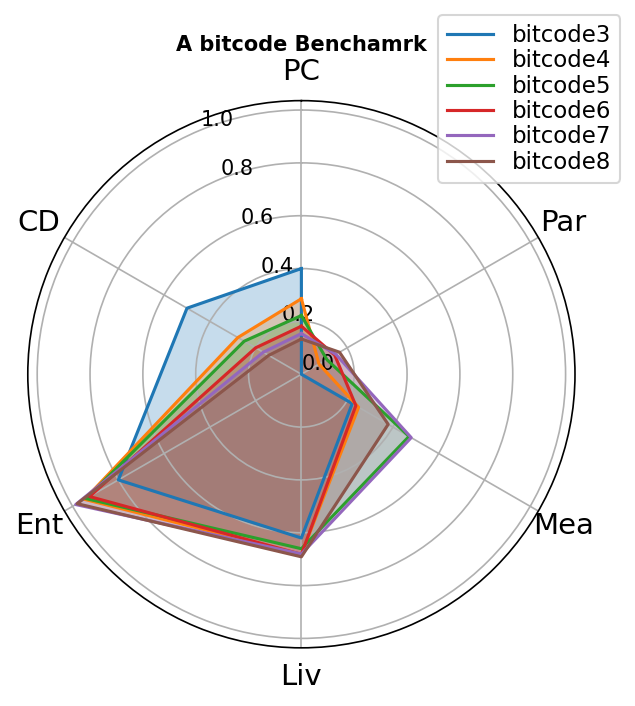

In [8]:
names=[]
scores=[]
X="A "+name_of_algo+' Benchamrk'
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark(
        [X,names,scores],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
        show=True)

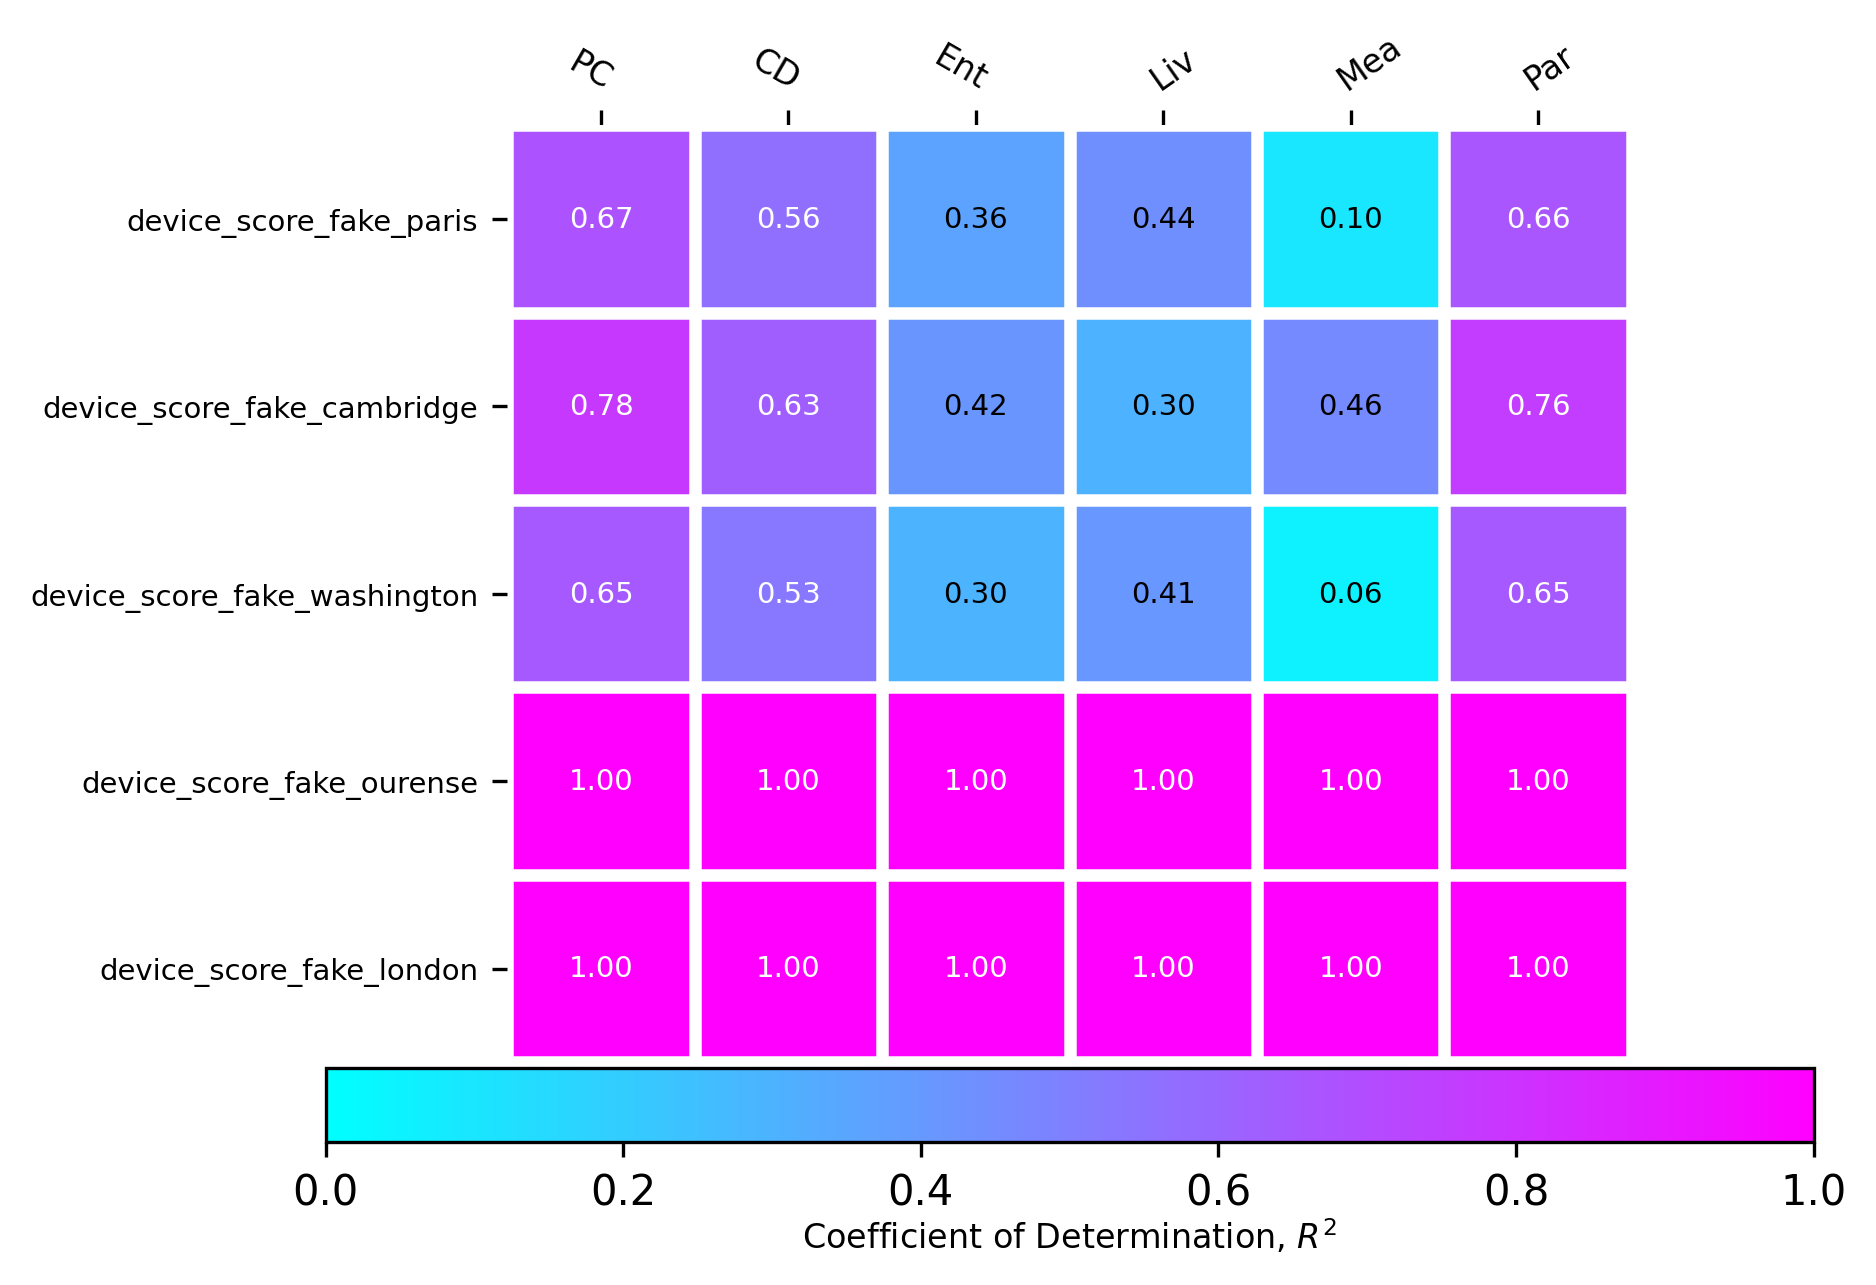

In [9]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

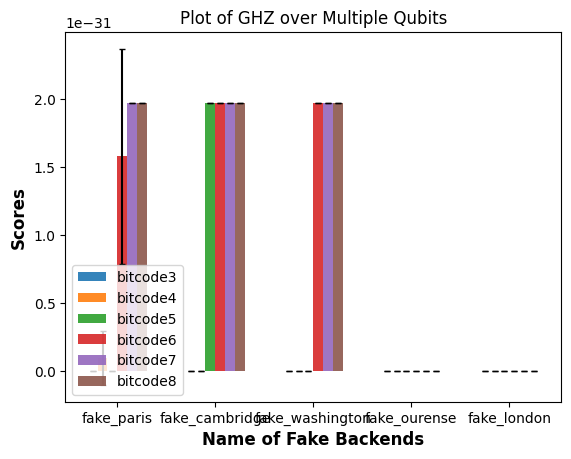

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
all_fake_names=[]
all_score=[]
all_sd=[]
all_ckt=[]
for i in selected_fakes:
    all_fake_names.append(i().name)    
for benchmark, label in benchmarks:
    i=[]
    j=[]
    k=[]
    for ckt,benchmark,backend,job,score,sd in jobs:
        if ckt == label:
            i.append(score)
            j.append(sd)
    all_ckt.append(label)
    all_score.append(i)
    all_sd.append(j)
num_bars = len(all_score)
width = 0.1
x = np.arange(len(all_fake_names)) # x-axis positions for each bar
fig, ax = plt.subplots()
for i in range(num_bars):               # Create bars for each category with appropriate offsets
    ax.bar(x + i * width, all_score[i], width=width, label=f'Bar {i+1}', 
           yerr=all_sd[i],align='center',alpha=0.9,ecolor='black',capsize=2)
ax.set_xlabel('Name of Fake Backends',fontweight ='bold',fontsize = 12)
ax.set_ylabel('Scores',fontweight ='bold',fontsize = 12)
ax.set_title('Plot of GHZ over Multiple Qubits')
ax.set_xticks(x + (num_bars - 1) * width / 2)
ax.set_xticklabels(all_fake_names)
ax.legend(all_ckt,loc="lower left")
#ax.grid(True)
plt.show()